In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
import transformers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Embedding, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
# Load the data
train = pd.read_csv('stressTrain.csv')
test = pd.read_csv('stressTest.csv')

In [35]:
train = train.drop(['post_id', 'sentence_range', 'id'], axis=1)
test = test.drop(['post_id', 'sentence_range', 'id'], axis=1)

df = pd.concat([train, test], axis=0, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)


In [36]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['subreddit'] = le.fit_transform(df['subreddit'])

In [37]:
# Tokenize text using BERT tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [38]:
# Tokenize and pad text sequences
max_len = 128  # Define your maximum sequence length
X_text = df['text'].tolist()
X_text = ["[CLS] " + text + " [SEP]" for text in X_text]  # Add [CLS] and [SEP] tokens
X_tokens = [tokenizer.tokenize(text) for text in X_text]
X_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in X_tokens]
X_padded = sequence.pad_sequences(X_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post")

In [39]:
# Splitting data into train and test sets
X_other = df.drop(columns=['text', 'label']).values
X_train, X_test, y_train, y_test = train_test_split(X_padded, df['label'], test_size=0.2, random_state=42)

In [40]:
# Define BiLSTM with BERT embedding model
num_classes = 1  # Binary classification
model = Sequential([
    Embedding(input_dim=len(tokenizer.vocab), output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(num_classes, activation='sigmoid')
])

In [41]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
80/80 [==============================] - 28s 276ms/step - loss: 0.6918 - accuracy: 0.5456 - val_loss: 0.6897 - val_accuracy: 0.5368
Epoch 2/10
80/80 [==============================] - 22s 275ms/step - loss: 0.6878 - accuracy: 0.5440 - val_loss: 0.6849 - val_accuracy: 0.5404
Epoch 3/10
80/80 [==============================] - 22s 277ms/step - loss: 0.6612 - accuracy: 0.5776 - val_loss: 0.6243 - val_accuracy: 0.7018
Epoch 4/10
80/80 [==============================] - 21s 261ms/step - loss: 0.5720 - accuracy: 0.7419 - val_loss: 0.5923 - val_accuracy: 0.7368
Epoch 5/10
80/80 [==============================] - 22s 272ms/step - loss: 0.4955 - accuracy: 0.7892 - val_loss: 0.5406 - val_accuracy: 0.6982
Epoch 6/10
80/80 [==============================] - 21s 264ms/step - loss: 0.4400 - accuracy: 0.8221 - val_loss: 0.5670 - val_accuracy: 0.7228
Epoch 7/10
80/80 [==============================] - 21s 260ms/step - loss: 0.3793 - accuracy: 0.8576 - val_loss: 0.6020 - val_accuracy: 0.7088

In [43]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

23/23 [==============================] - 1s 45ms/step - loss: 0.7120 - accuracy: 0.7229
Test Loss: 0.7119525074958801
Test Accuracy: 0.7229254841804504


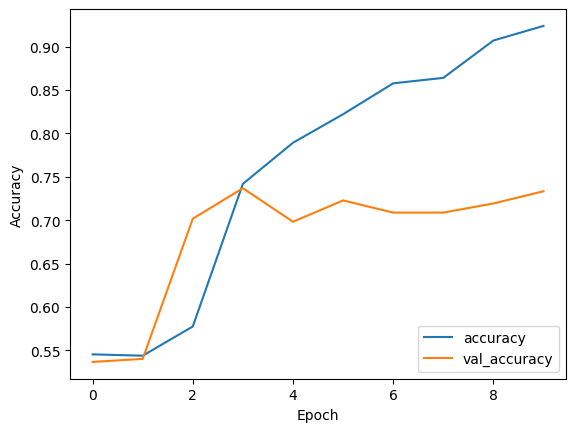

In [44]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [46]:
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout, Embedding, Input

In [47]:
# Define BiGRU with BERT embedding model
num_classes = 1  # Binary classification
model = Sequential([
    Embedding(input_dim=len(tokenizer.vocab), output_dim=128, input_length=max_len),
    Bidirectional(GRU(64, return_sequences=False)),
    Dropout(0.5),
    Dense(num_classes, activation='sigmoid')
])


In [48]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
80/80 [==============================] - 27s 260ms/step - loss: 0.6925 - accuracy: 0.5057 - val_loss: 0.6896 - val_accuracy: 0.5404
Epoch 2/10
80/80 [==============================] - 21s 261ms/step - loss: 0.6898 - accuracy: 0.5334 - val_loss: 0.6873 - val_accuracy: 0.5404
Epoch 3/10
80/80 [==============================] - 20s 252ms/step - loss: 0.6860 - accuracy: 0.5409 - val_loss: 0.6838 - val_accuracy: 0.5544
Epoch 4/10
80/80 [==============================] - 20s 249ms/step - loss: 0.6793 - accuracy: 0.5886 - val_loss: 0.6769 - val_accuracy: 0.6105
Epoch 5/10
80/80 [==============================] - 20s 256ms/step - loss: 0.6529 - accuracy: 0.6402 - val_loss: 0.6225 - val_accuracy: 0.6421
Epoch 6/10
80/80 [==============================] - 19s 240ms/step - loss: 0.5732 - accuracy: 0.7286 - val_loss: 0.5687 - val_accuracy: 0.7158
Epoch 7/10
80/80 [==============================] - 21s 261ms/step - loss: 0.5007 - accuracy: 0.7728 - val_loss: 0.5438 - val_accuracy: 0.7263

In [49]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

23/23 [==============================] - 1s 40ms/step - loss: 0.5684 - accuracy: 0.7553
Test Loss: 0.5684298276901245
Test Accuracy: 0.75527423620224


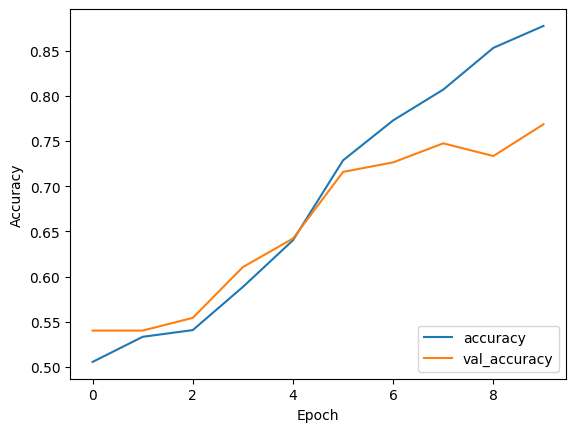

In [51]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()